<a href="https://colab.research.google.com/github/JoeBwonKenobi/Project-2/blob/main/Project2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project2 Part 4**

Joe Lardie

Jan 2023

Objective Overview:

The overall objective of the project is to predict the probability of customers making a claim on their insurance based on a number of different factors.

##**Objectives part 2**

- Requirements:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

##**Objectives part 3**

-For this part of the project, you will continue your data exploration by:

- Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

- Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

- Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder.
- These visuals should be reporting quality with titles, labels, and a short explanation of the trend. 

- Be sure to explain in a text cell the finding associated with each visual.

- Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).

##**Objectives part 4**

-Ensure that you complete the appropriate pre-processing steps.

-Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).

-Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).

-Evaluate model performance with appropriate metrics for the model.
Choose your "production" model and justify this decision.

-Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).

-Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.

-Commit your code to GitHub.

##**Imports**

In [1]:
#Numpy
import numpy as np

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Sklearn preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Sklearn Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
set_config(display = 'diagram')

#Sklearn Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV


-Here is the link to the orignal data source:

https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

##**Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Load Data for Car Insurance Data
card = '/content/drive/MyDrive/CodingDojo/Colab Notebooks/Stack 2/Data/Car Insurance Data.csv'
df = pd.read_csv(card)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [4]:
#Making a copy of data frame
cid = df.copy()

In [5]:
# Display the number of rows and columns for the dataframe
cid.shape
print(f'There are {cid.shape[0]} rows, and {cid.shape[1]} columns.')
print(f'The rows represent {cid.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10000 rows, and 19 columns.
The rows represent 10000 observations, and the columns represent 18 features and 1 target variable.


In [6]:
#Retreiveing basic info about our data
cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
cid.describe(include='all')

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000,10000,10000,10000,10000,10000,9018.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,9043.000000,10000,10000.000000,10000.00000,10000.000000,10000.000000
unique,NaN,4,2,2,4,3,4,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,26-39,female,majority,0-9y,high school,upper class,NaN,NaN,before 2015,NaN,NaN,NaN,NaN,sedan,NaN,NaN,NaN,NaN
freq,NaN,3063,5010,9012,3530,4157,4336,NaN,NaN,6967,NaN,NaN,NaN,NaN,9523,NaN,NaN,NaN,NaN
mean,500521.906800,NaN,NaN,NaN,NaN,NaN,NaN,0.515813,0.697000,NaN,0.498200,0.688800,19864.548400,11697.003207,NaN,1.482900,0.23920,1.056300,0.313300
std,290030.768758,NaN,NaN,NaN,NaN,NaN,NaN,0.137688,0.459578,NaN,0.500022,0.463008,18915.613855,2818.434528,NaN,2.241966,0.55499,1.652454,0.463858
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.053358,0.000000,NaN,0.000000,0.000000,10238.000000,2000.000000,NaN,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.417191,0.000000,NaN,0.000000,0.000000,10238.000000,10000.000000,NaN,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.525033,1.000000,NaN,0.000000,1.000000,10238.000000,12000.000000,NaN,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.618312,1.000000,NaN,1.000000,1.000000,32765.000000,14000.000000,NaN,2.000000,0.00000,2.000000,1.000000


###**Taking out Unecessary columns**

In [8]:
#The 'ID' column is not relevant to our target, therefore we will get rid if it
cid.drop('ID', axis=1, inplace=True)

###**Dropping Duplicate Rows**

In [9]:
# Display the number of duplicate rows in the dataset
print(f'There are {cid.duplicated().sum()} duplicate rows.')

There are 12 duplicate rows.


In [10]:
#Dropping duplicated Rows
cid = cid.drop_duplicates()

In [11]:
# Comfirming there are no more duplicates 
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##**Checking for Missing Values**

In [12]:
#Checking for missing values
cid[cid.isna().any(axis=1)].shape

(1839, 18)

In [13]:
#Identifying the columns containing missing values
cid.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           970
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

- These missing values can be imputed using a simple imputer strategy 'mean'

In [14]:
#Imputer
imputer= SimpleImputer(strategy='mean')
imputer

SimpleImputer()

In [15]:
cid.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           970
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

- Missing values have been addressed.

###**Checking Vaule Counts**

In [16]:
for col in cid.columns:
    print(cid[col].value_counts())

26-39    3062
40-64    2931
16-25    2005
65+      1990
Name: AGE, dtype: int64
female    5003
male      4985
Name: GENDER, dtype: int64
majority    9000
minority     988
Name: RACE, dtype: int64
0-9y      3519
10-19y    3298
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64
high school    4151
university     3927
none           1910
Name: EDUCATION, dtype: int64
upper class      4335
middle class     2138
poverty          1804
working class    1711
Name: INCOME, dtype: int64
0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64
1    6967
0    3021
Name: VEHICLE_OWNERSHIP, dtype: int64
before 2015    6955
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64
0    5007
1    4981
Name: MARRIED, dtype: int64
1    6885
0    3103
Name: CHILDREN, dtype: int64
10238    6929
32765    2455
92101     484
21217     120
Name: POSTAL_CO

In [17]:
value_counts = cid.apply(pd.value_counts).stack()

In [18]:
cid.value_counts('CREDIT_SCORE')

CREDIT_SCORE
0.053358    1
0.586604    1
0.586321    1
0.586345    1
0.586356    1
           ..
0.457110    1
0.457073    1
0.456999    1
0.456883    1
0.960819    1
Length: 9018, dtype: int64

In [19]:
cid['CREDIT_SCORE'] = cid['CREDIT_SCORE'] * 10**3

In [20]:
cid.value_counts('CREDIT_SCORE')

CREDIT_SCORE
53.357545     1
586.603537    1
586.320546    1
586.344861    1
586.355767    1
             ..
457.110218    1
457.072833    1
456.998546    1
456.883465    1
960.818828    1
Length: 9018, dtype: int64

In [21]:
X= cid.drop('OUTCOME', axis=1)
y=cid['OUTCOME']

##**Validation Split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [23]:
#OneHotEncoder
ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')

In [24]:
#Standard Scaler
scaler = StandardScaler()

In [25]:
#Instantiate the selectors 
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [26]:
#Forming pipelines
num_pipe = make_pipeline(scaler, imputer)
cat_pipe = make_pipeline(ohe)

In [27]:
transformer1 = RandomForestClassifier()
transformer1

RandomForestClassifier()

In [28]:
#Create Tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [29]:
#Instantiate preprocessor Transformers
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43b20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43df0>)])

In [30]:
pipe = Pipeline([('preprocessor', preprocessor), ('transformer1', transformer1)])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43b20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43df0>)])),
                ('transformer1', RandomForestClassifier())])

In [31]:
#Fit on the Train
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43b20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43df0>)])),
                ('transformer1', RandomForestClassifier())])

In [32]:
#Predictions
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
#Accuracy score
accuracy_score(y_test,y_pred)

0.8362034441329596

In [34]:
#F1 Score
f1_score(y_test,y_pred)

0.7256874580818243

##**Univariate Visualizations of features**

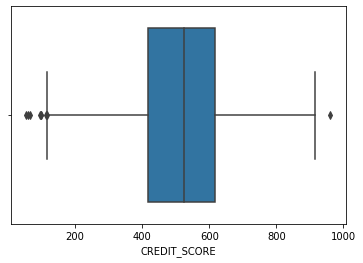

In [35]:
sns.boxplot(data=cid, x='CREDIT_SCORE');

- Above we see the median credit score is about 520

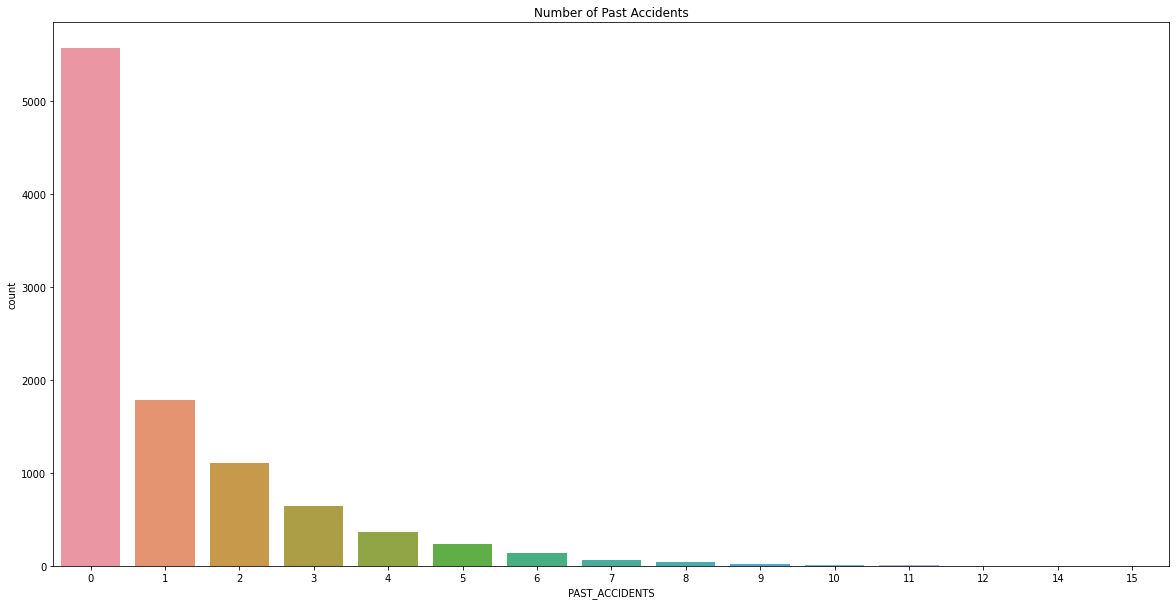

In [36]:
plt.figure(figsize=(20,10))
plt.title('Number of Past Accidents')
sns.countplot(data=cid, x ='PAST_ACCIDENTS');

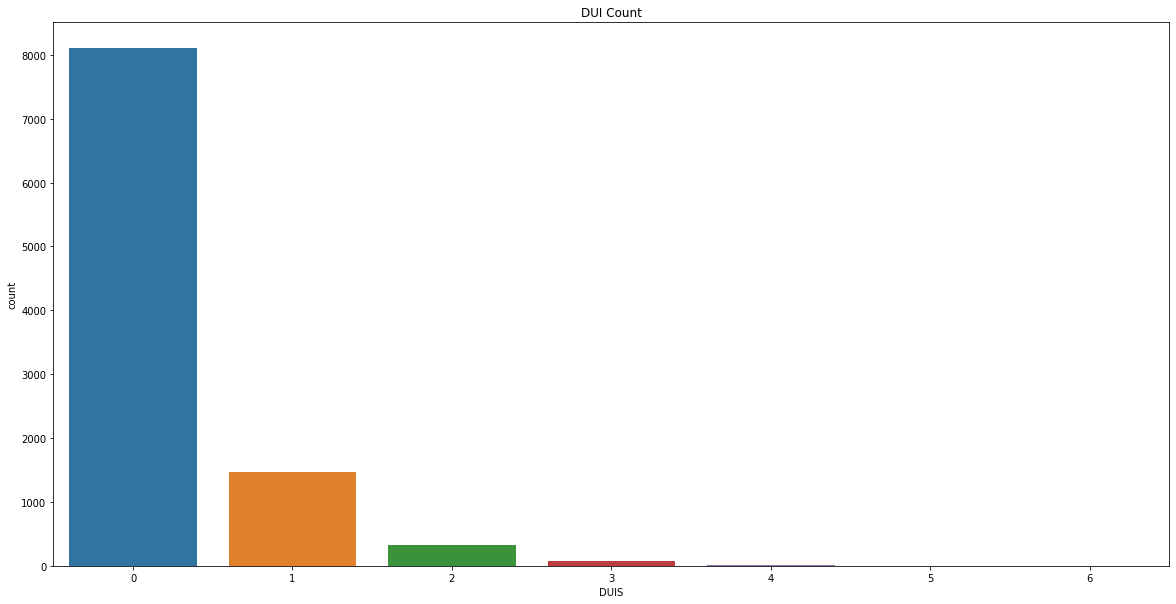

In [37]:
plt.figure(figsize=(20,10))
plt.title('DUI Count')
sns.countplot(data=cid, x ='DUIS');

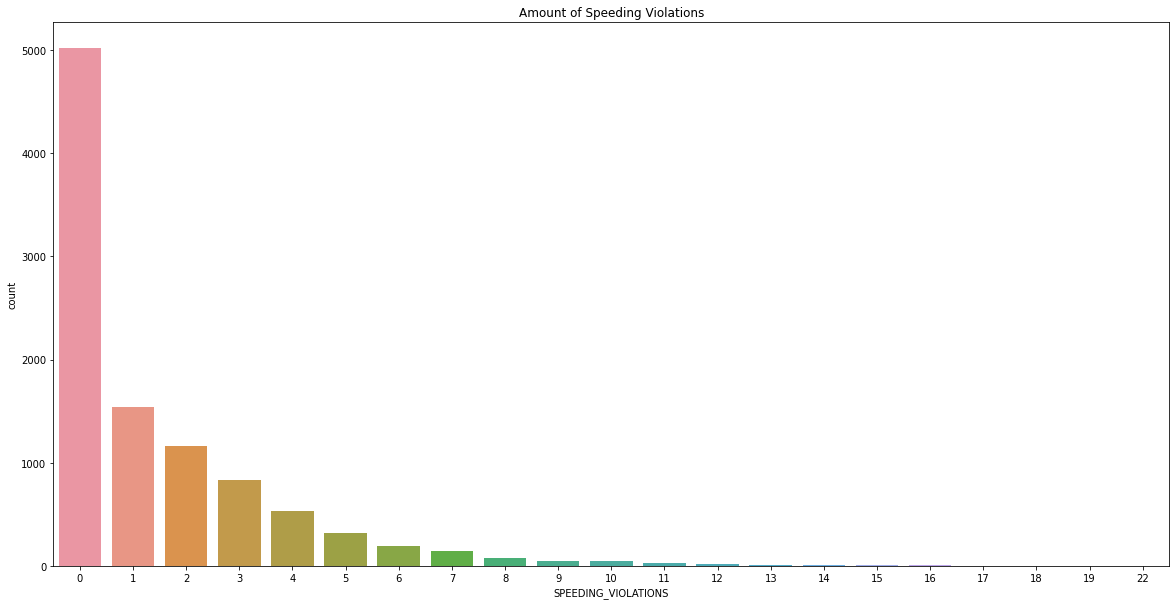

In [38]:
plt.figure(figsize=(20,10))
plt.title('Amount of Speeding Violations')
sns.countplot(data=cid, x ='SPEEDING_VIOLATIONS');

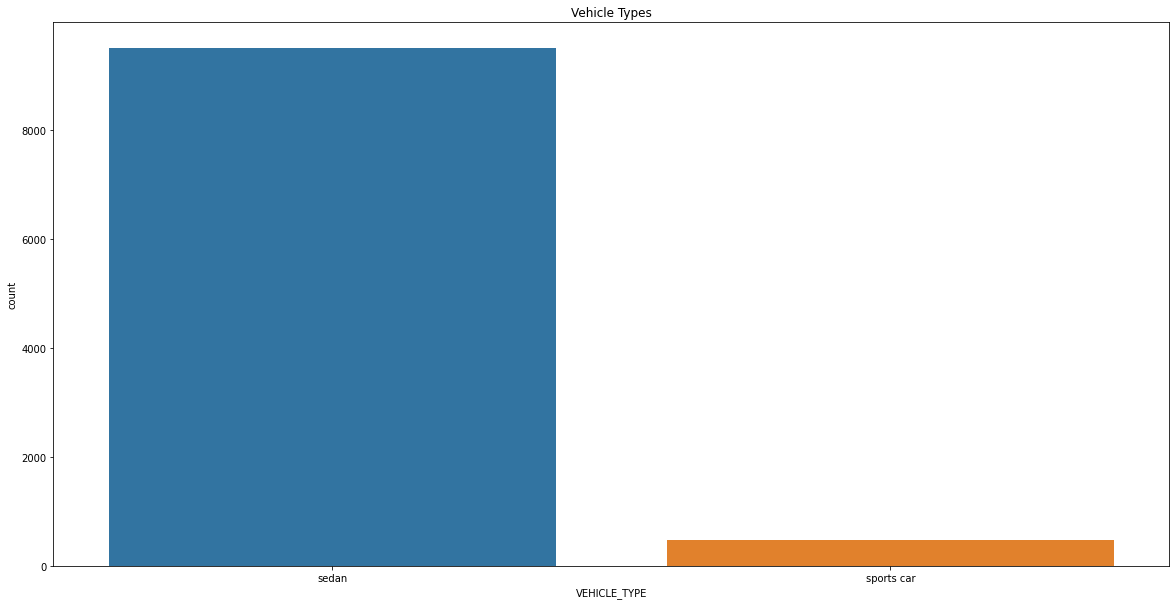

In [39]:
plt.figure(figsize=(20,10))
plt.title('Vehicle Types')
sns.countplot(data=cid, x ='VEHICLE_TYPE');

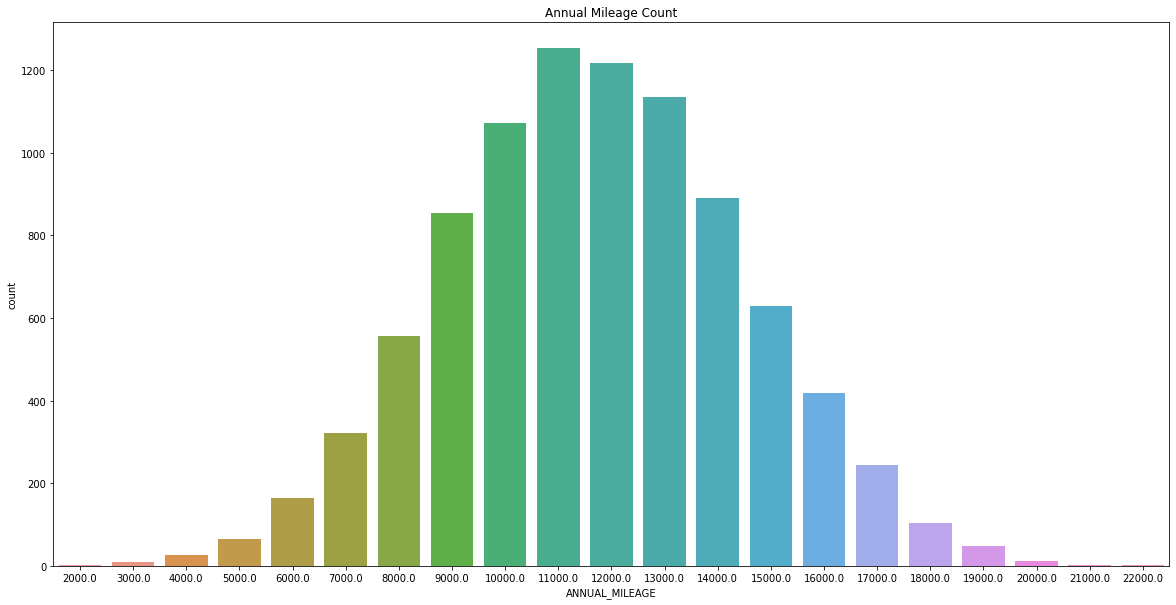

In [40]:
plt.figure(figsize=(20,10))
plt.title('Annual Mileage Count')
sns.countplot(data=cid, x ='ANNUAL_MILEAGE');

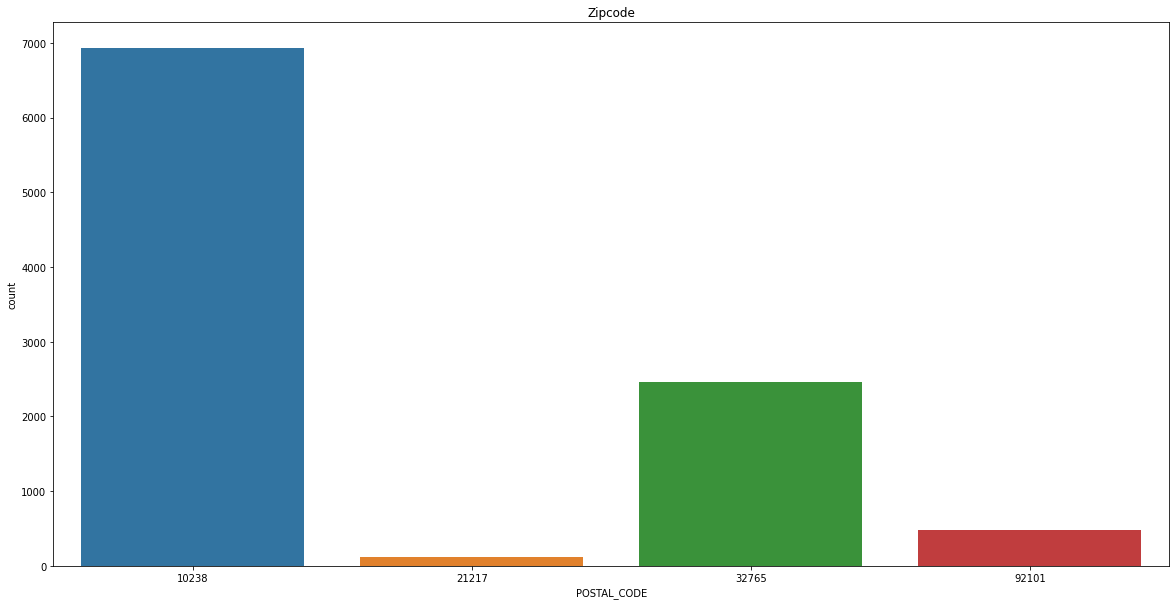

In [41]:
plt.figure(figsize=(20,10))
plt.title('Zipcode')
sns.countplot(data=cid, x ='POSTAL_CODE');

This shows that the majority of the drivers came from the postal code 10238, and the smallest amount of our drivers came from 21217.

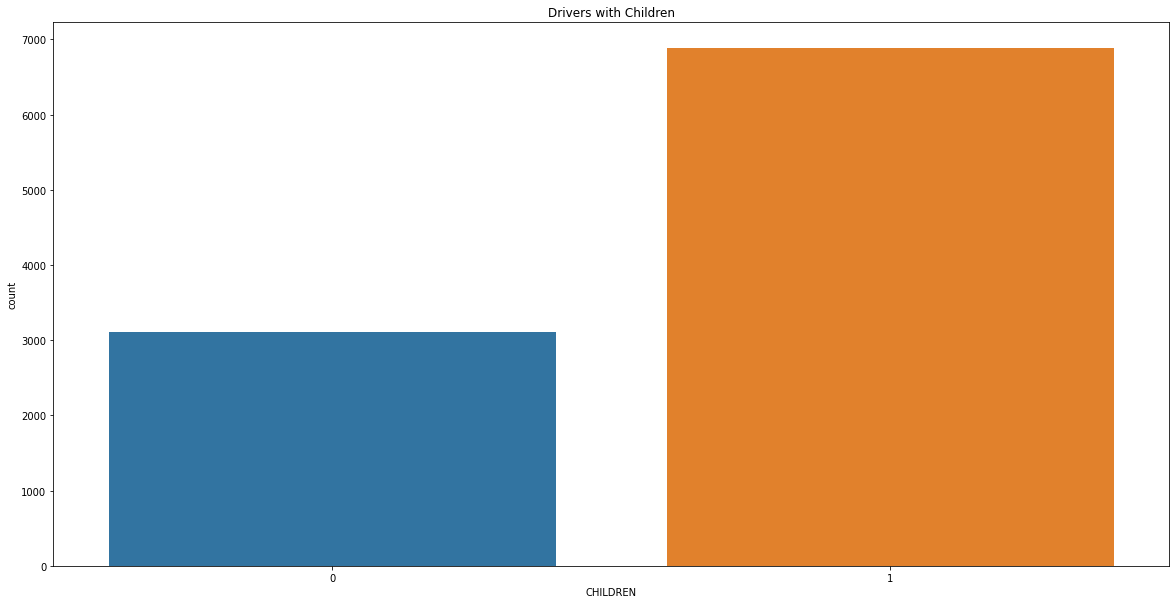

In [42]:
plt.figure(figsize=(20,10))
plt.title('Drivers with Children')
sns.countplot(data=cid, x ='CHILDREN');

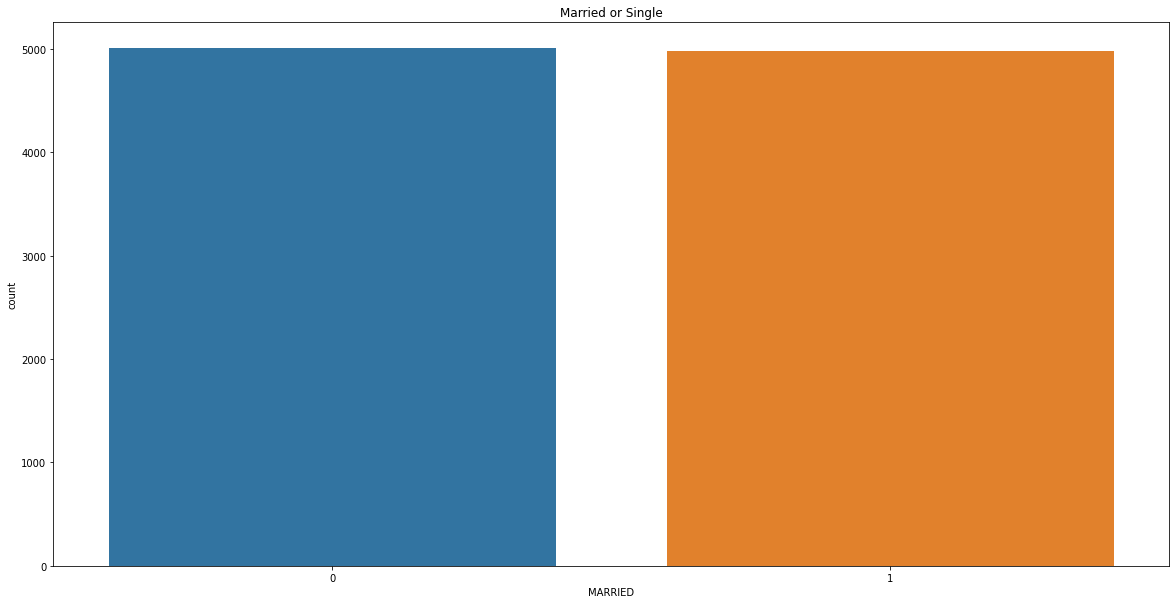

In [43]:
plt.figure(figsize=(20,10))
plt.title('Married or Single')
sns.countplot(data=cid, x ='MARRIED');

- Our data is very close to being balanced as far as the marrage column.

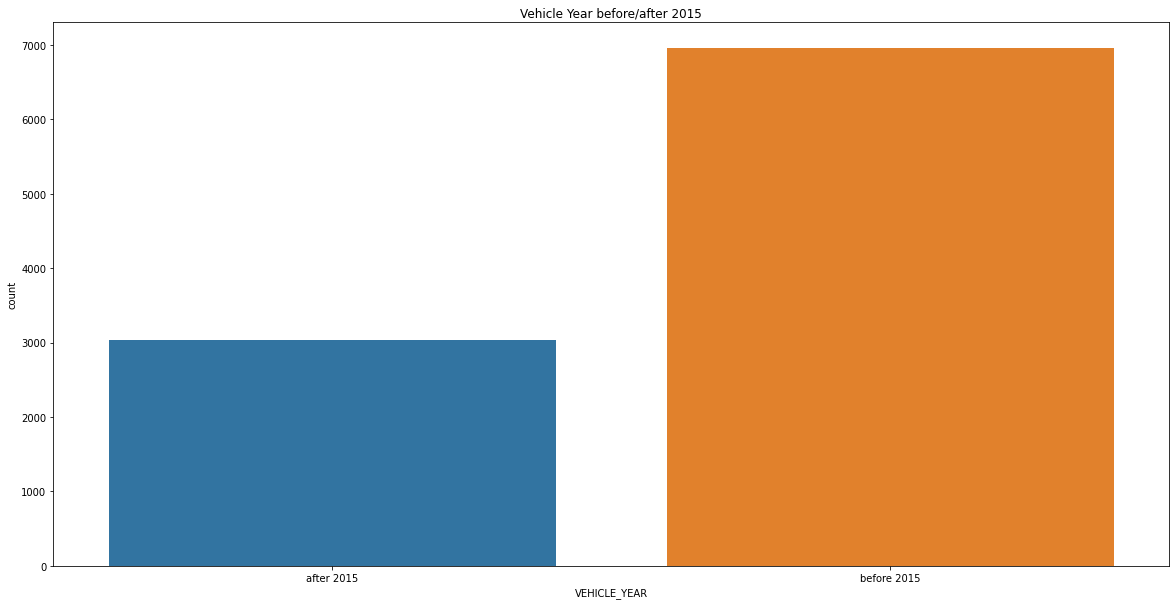

In [44]:
plt.figure(figsize=(20,10))
plt.title('Vehicle Year before/after 2015')
sns.countplot(data=cid, x ='VEHICLE_YEAR');

- The majority of the vehicles in our data are from before 2015.

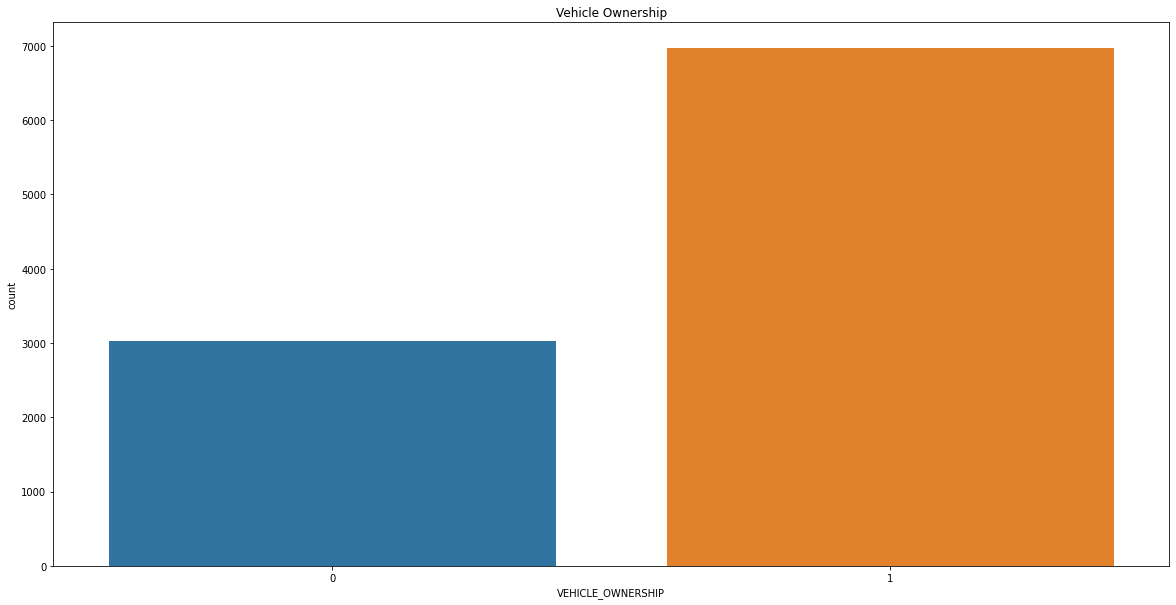

In [45]:
plt.figure(figsize=(20,10))
plt.title('Vehicle Ownership')
sns.countplot(data=cid, x ='VEHICLE_OWNERSHIP');

- This shows us that the majority of people own their vehicle.

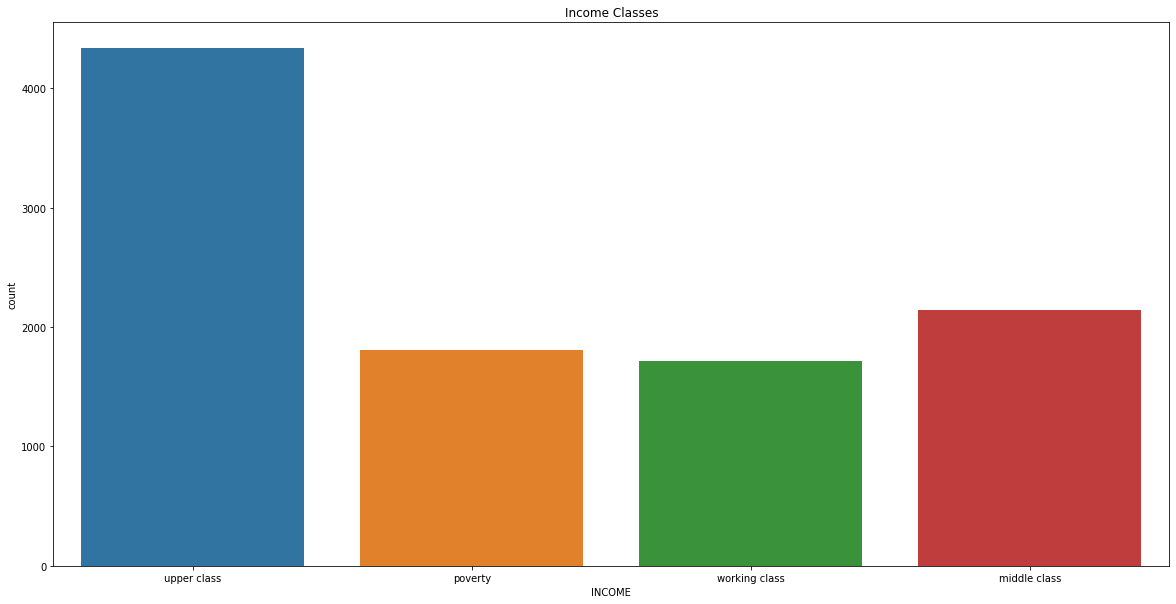

In [46]:
plt.figure(figsize=(20,10))
plt.title('Income Classes')
sns.countplot(data=cid, x ='INCOME');

- This shows us that the upper class is dominant but quite a large margin. 
- Working class and poverty are definately the smallest out of the four classes.

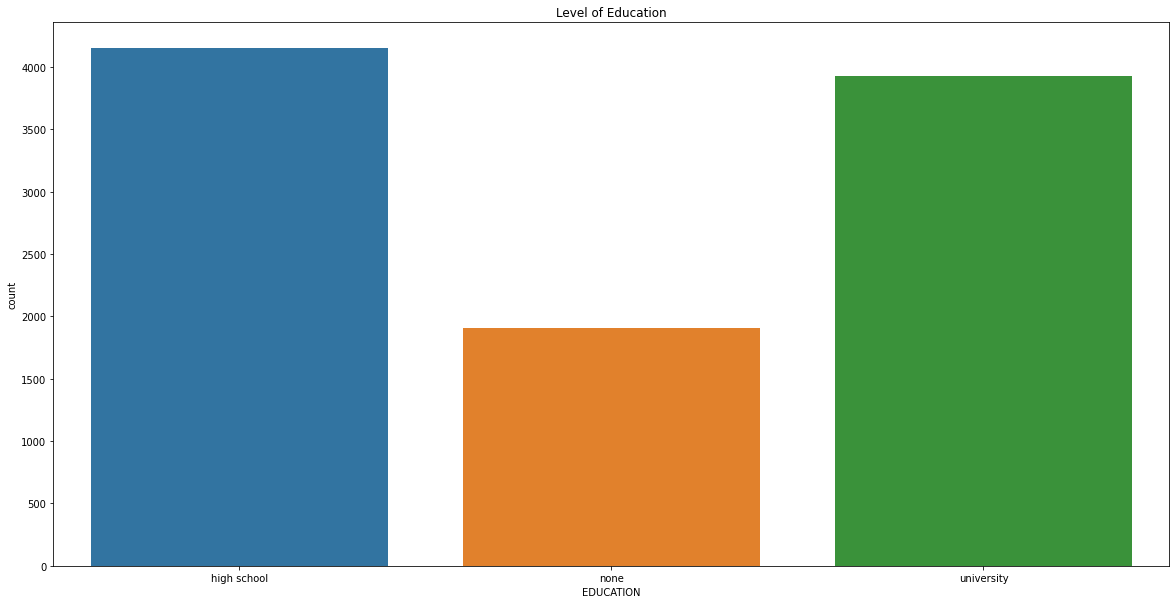

In [47]:
plt.figure(figsize=(20,10))
plt.title('Level of Education')
sns.countplot(data=cid, x ='EDUCATION');

- This shows us that most of the people in our data set have at least high school level education. There is only a small difference in the amount of people who have a high school education, and people who have a university level education.

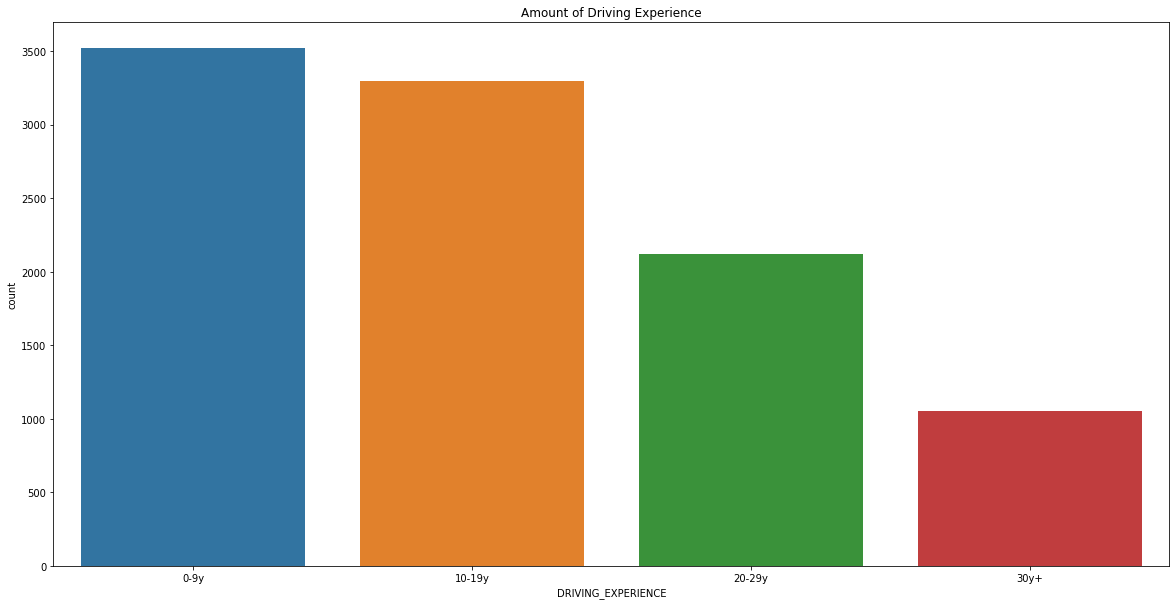

In [48]:
plt.figure(figsize=(20,10))
plt.title('Amount of Driving Experience')
sns.countplot(data=cid, x ='DRIVING_EXPERIENCE');

- This shows that the majority of people have less than 9 years driving experience. The smallest category of people had 30+ years of driving experience.

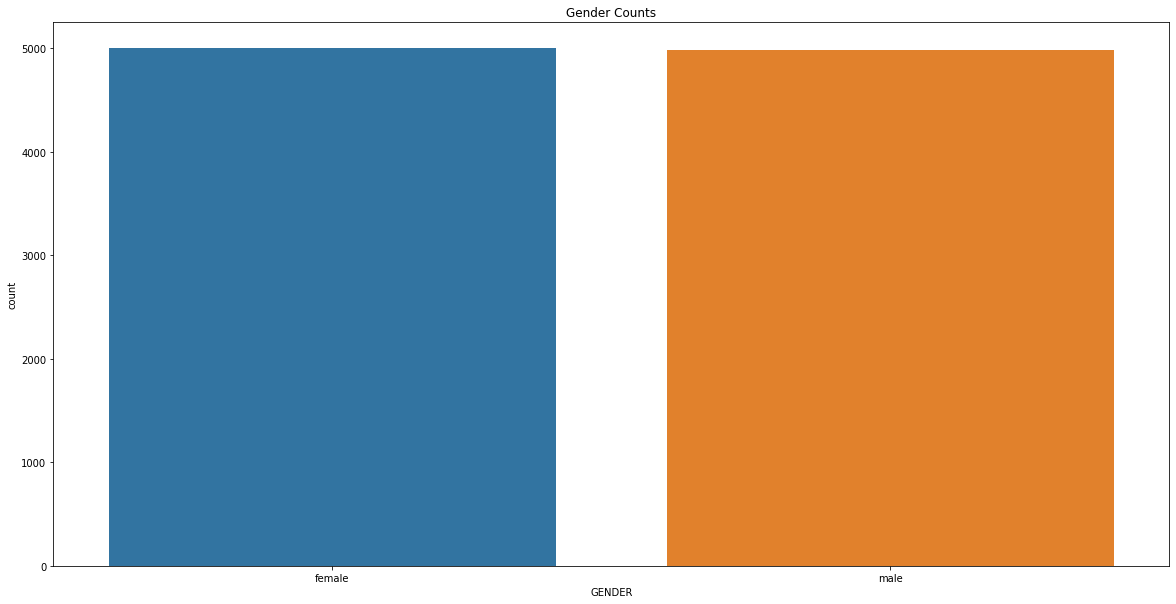

In [49]:
plt.figure(figsize=(20,10))
plt.title('Gender Counts')
sns.countplot(data=cid, x ='GENDER');

-Our data seems to be balanced as far as the amounts of males and females.

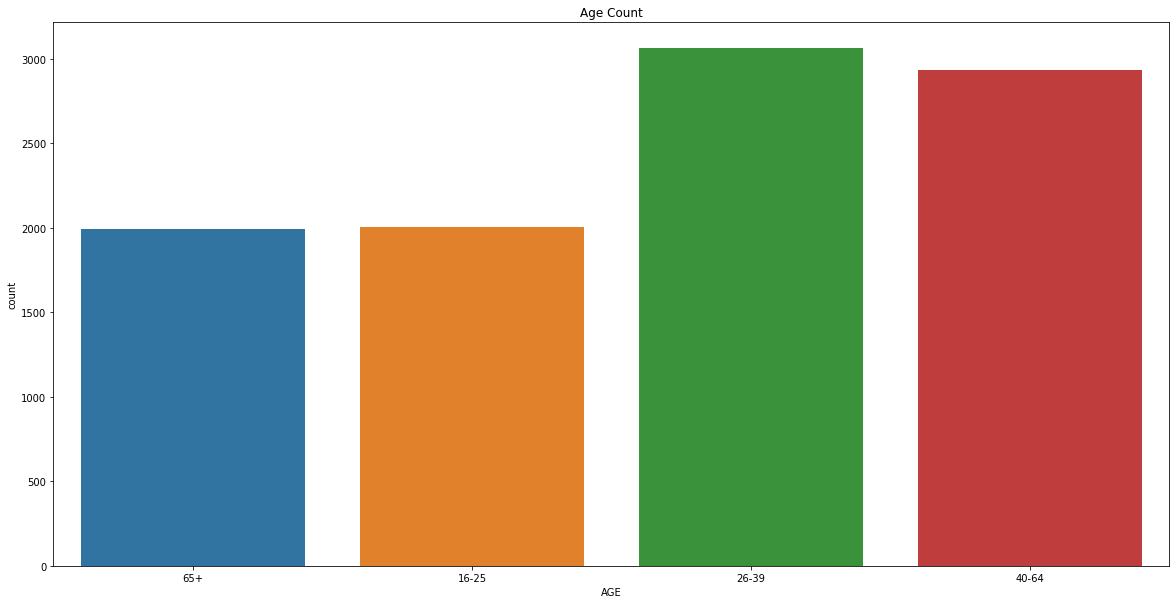

In [50]:
plt.figure(figsize=(20,10))
plt.title('Age Count')
sns.countplot(data=cid, x ='AGE');

-This shows us our biggest age group is 26-39, the two smallest groups are 16-25& 65+.

##**Correlation Heatmap**

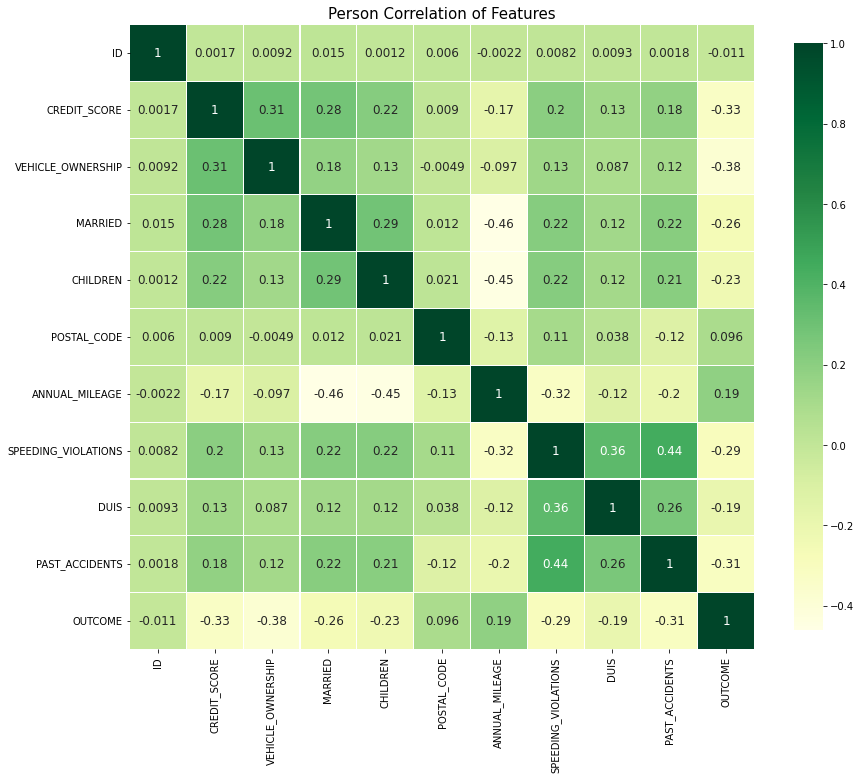

In [51]:
def correlation_heatmap(cid):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Person Correlation of Features', y=1.05, size=15)

correlation_heatmap(cid)

###**Multivariate Visualizations**

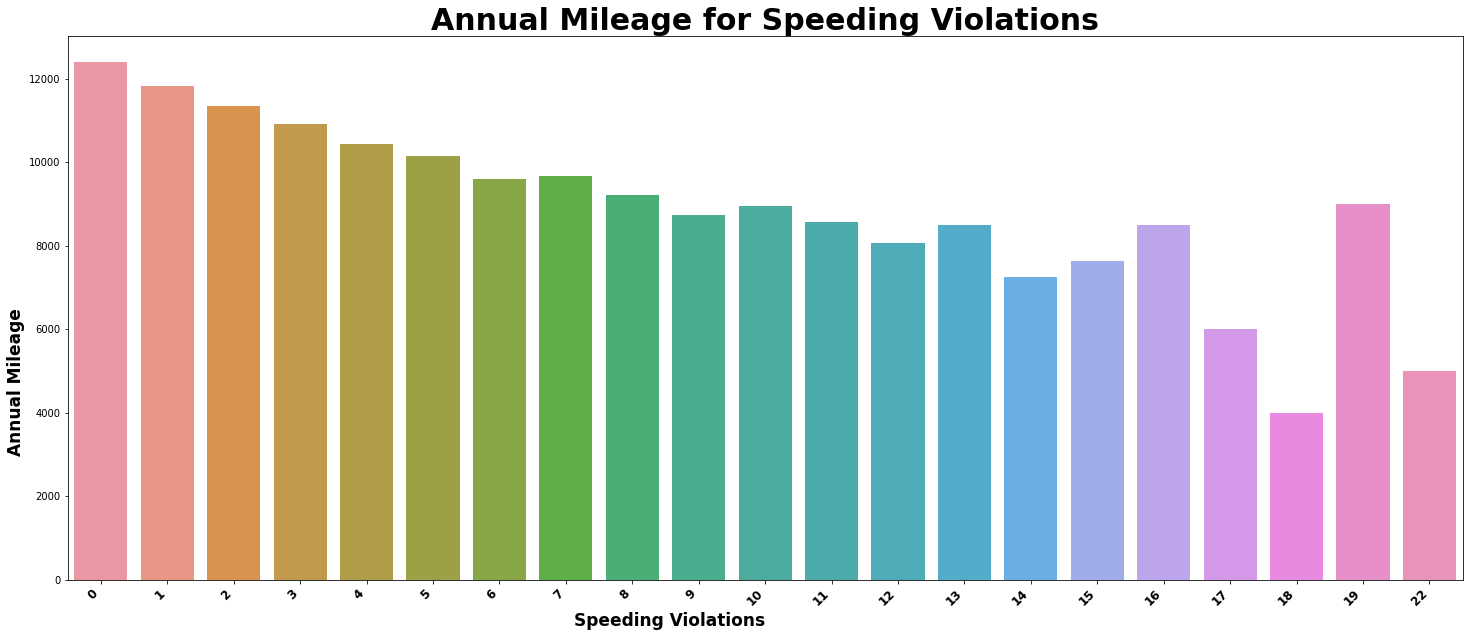

In [52]:
# Set the figure size
plt.figure(figsize=(25, 10));
#Make Barplot
sns.barplot(
    x="SPEEDING_VIOLATIONS", 
    y="ANNUAL_MILEAGE", 
    data=cid, 
    estimator=np.mean, 
    ci=None)
# Add title and axis names
plt.xticks(rotation=45, fontsize = 12, fontweight = 'bold', ha = 'right');
plt.title('Annual Mileage for Speeding Violations',fontweight='bold', color = 'Black', fontsize='30', horizontalalignment='center');
plt.xlabel('Speeding Violations',fontweight='bold', fontsize='17', horizontalalignment='right');
plt.ylabel('Annual Mileage',fontweight='bold', fontsize='17', horizontalalignment='right');
plt.show()

- This is showing us the annual mileage of the different amount of speeding violations.

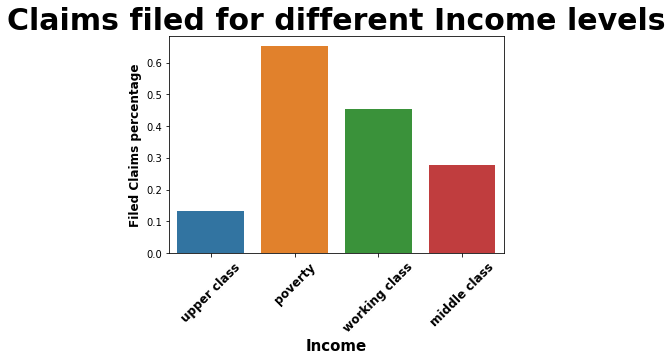

In [53]:
sns.barplot(
    x="INCOME", 
    y="OUTCOME",
    data=cid,
    estimator=np.mean, 
    ci=None);
plt.xticks(rotation=45, fontsize = 12, fontweight = 'bold')
plt.xlabel('Income',fontweight='bold', fontsize='15')
plt.ylabel('Filed Claims percentage',fontweight='bold', fontsize='12')
plt.title('Claims filed for different Income levels',fontweight='bold', color = 'Black', fontsize='30');

- This shows the different percentage of people in each income class that filed a claim.

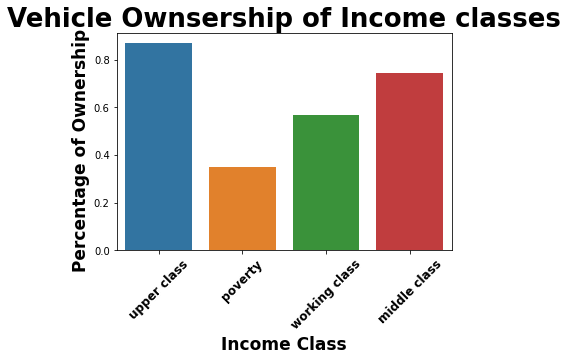

In [54]:
sns.barplot(
    x="INCOME", 
    y="VEHICLE_OWNERSHIP", 
    data=cid, 
    estimator=np.mean, 
    ci=None);
plt.xticks(rotation=45, fontsize = 12, fontweight = 'bold');
plt.title('Vehicle Ownsership of Income classes',fontweight='bold', color = 'Black', fontsize='26');
plt.xlabel('Income Class',fontweight='bold', fontsize='17');
plt.ylabel('Percentage of Ownership   ',fontweight='bold', fontsize='17');

- This shows us the percentage of people in each imcome class who own their own car.
- The people who do not own their own car are most likely easing their vehicle.
- The trend we are clearly able to see here is that the higher income class someone is in, the better chance there is that they own their own car.

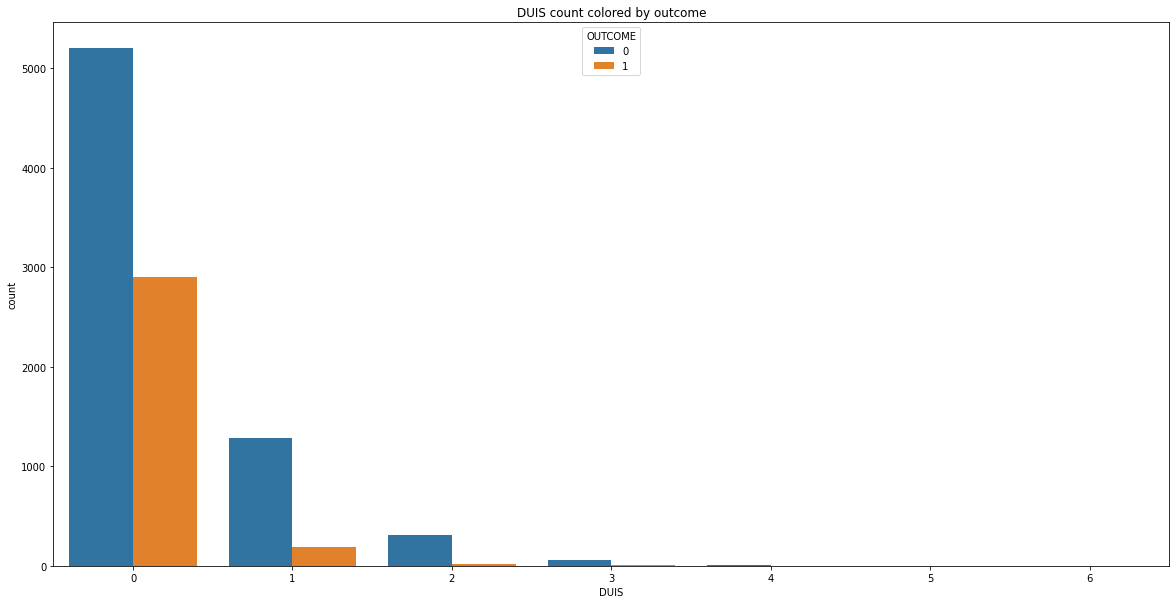

In [55]:
plt.figure(figsize=(20,10))
plt.title('DUIS count colored by outcome')
sns.countplot(data=cid, x='DUIS',hue='OUTCOME');

-This is the second visualization I'm choosing to show a trend occurring in the data.
- This shows us the number of people who had Dui's for each possible outcome result(1 or 0)
- There seems to be somewhat of a trend with the people who have no Dui's are more prone to make a claim on their insurance. This is most likely because the people who have at least one Dui went to jail and their insurance company more than likely dropped their coverage, or at the least they did not make a claim on their insurance because they don't offer coverage for people who are in an accident under the influence.

##**Machine Learning Models**

###**Logistic Regression Model**

In [56]:
# Create a logistic regression object
lr = LogisticRegression(random_state=42)

In [57]:
#Make Logistic Regression Model
lr_pipe= make_pipeline(preprocessor, lr)

In [58]:
#Fitting Logistic Regrerssion Model
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43b20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43df0>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [59]:
_# Make predictions on the test data
X_pred = lr_pipe.predict(X_test)
X_pred

array([0, 1, 0, ..., 0, 0, 0])

In [60]:
print('Train accuracy score for LG:', lr_pipe.score(X_train, y_train))
print('Test accuracy score for LG:', lr_pipe.score(X_test, y_test))

Train accuracy score for LG: 0.8463489520758243
Test accuracy score for LG: 0.8414096916299559


###**Tuning Logistic Regression Model**

In [61]:
#Looking at possible hyperparameters to tune
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43b20>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43df0>)])),
  ('logisticregression', Lo

In [62]:
#lr_param_grid = {'logisticregression__C': 1000,
                 #'logisticregression__max_iter': 1000,
                 #'logisticregression__penalty': 'l2',
                 #'logisticregression__solver': 'liblinear'}

#pd.DataFrame(lr_param_grid).T

In [63]:
#lr_gs = GridSearchCV(lr_pipe, lr_param_grid)

##**Random forrest Classifier**

In [64]:
#Random forest Classifier
rfc = RandomForestClassifier(random_state=42)

In [65]:
#Create Pipeline
rf_pipe = make_pipeline(preprocessor, rfc)

In [66]:
# Fitting the classifier to the dataset
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43b20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee0ee43df0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [67]:
#Make predictions using the training and testing data
train_pred = rf_pipe.predict(X_train)
test_pred = rf_pipe.predict(X_test)
train_pred[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [68]:
#Evaulate the model
train_score = rf_pipe.score(X_train, y_train)
test_score = rf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.999866506474436
0.8350020024028835


###**Grid Search CV**

In [69]:
#create and visualize our parameter grid
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
 
pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [70]:
scores = {}
 
#loop through all combinations of values for all hyperparameters
for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      model = RandomForestClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      model = rf_pipe.fit(X_train, y_train)
      score = model.score(X_test, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100
 
#Display dictionary of scores
scores

{'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 83.5002,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 83.5002,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 83.5002,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 83.5002,
 'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 83.5002,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 83.5002,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 83.5002,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 83.5002,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 83.5002,
 'depth 2, min_samples_leaf 3, min_samples_split 2 accuracy': 83.5002,
 'depth 2, min_samples_leaf 3, min_samples_split 10 accuracy': 83.5002,
 'depth 2, min_samples_leaf 3, min_samples_split 100 accuracy': 83.5002,
 'depth 2, min_samples_leaf 15, min_samples_split 2 accuracy': 83.5002,
 'depth 2, min_samples_leaf 15, min_samples_split 10 accur

In [77]:
dt_grid_search = GridSearchCV(estimator= rf_pipe, param_grid = param_grid, cv = 3)

In [78]:
dt_grid_search.fit(X_train, y_train)

ValueError: ignored